In [1]:
import cv2
import path
import matplotlib.pyplot as plt
import numpy as np

## Read img file

In [2]:
img_files = path.Path('./data').glob('*')
print(img_files)
imgs = list(map(lambda x:cv2.imread(str(x), cv2.IMREAD_COLOR),img_files))

[Path('./data\\1.jpg')]


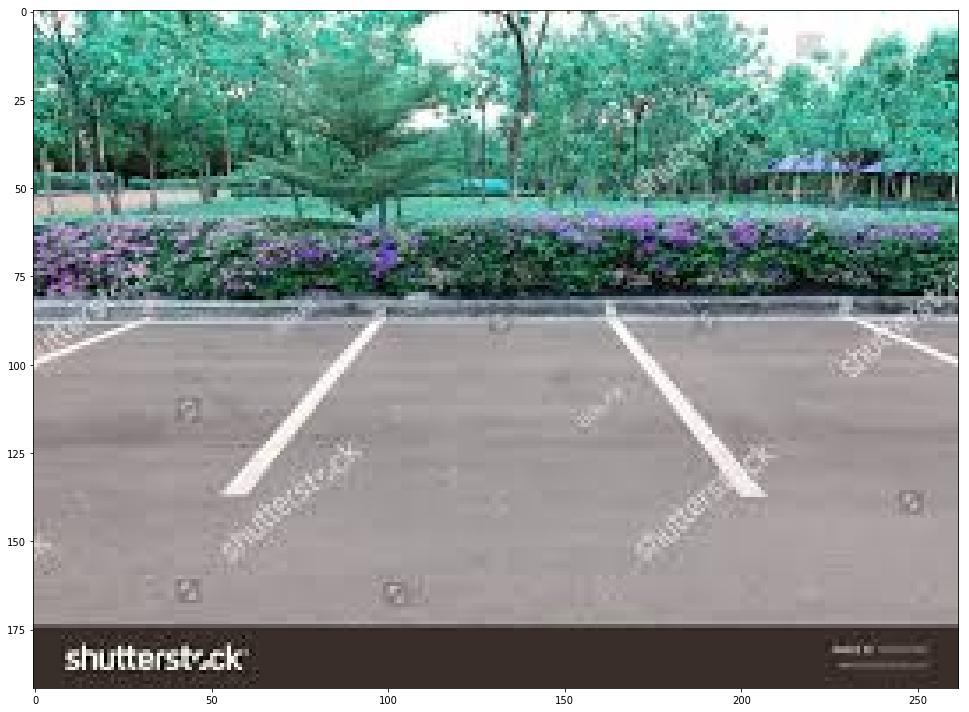

In [3]:
fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
cols = len(img_files)
for idx,img in enumerate(imgs):
    ax = fig.add_subplot(1, cols, idx+1)
    ax.imshow(img)
fig.tight_layout()

In [4]:
def show_image(img,rows,cols):
    
    fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
    start = 100
    diff = 100

    for i in range(1,rows*cols+1):
        min_thresh = start*i
        max_thresh = min_thresh+diff
        edges = cv2.Canny(img,min_thresh,max_thresh)
        ax = fig.add_subplot(rows, cols, i)
        ax.set_title('min: %d , max: %d'%(min_thresh,max_thresh))
        ax.imshow(edges)
        
    fig.tight_layout() 

<Figure size 432x288 with 0 Axes>

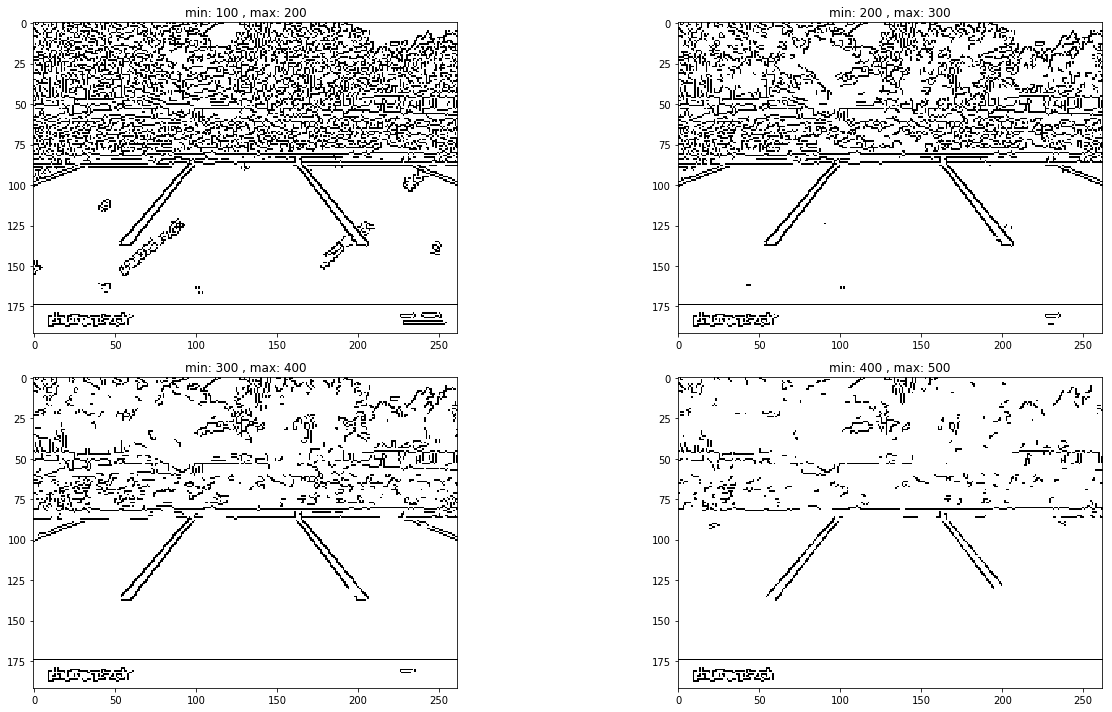

In [9]:
plt.set_cmap('Greys')
show_image(imgs[0],2,2)